('max', 5576663.0479999995)
('min', 3.6372471731994911)


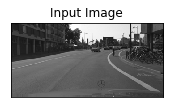

('shape', (168, 342))


In [15]:
#import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy as np

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

img = plt.imread('/users/zengxiaohui/Downloads/Picture1.png',0)
img = rgb2gray(img)
f = np.fft.fft2(img)
print('max', np.abs(f).max())
print('min', np.abs(f).min())
#fshift = np.fft.fftshift(f)
#magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
#plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

print('shape', f.shape)

35789
1001


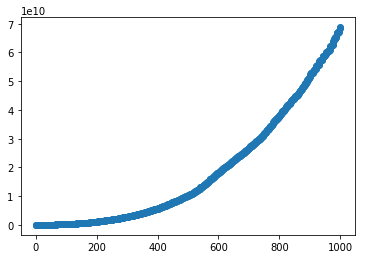

In [17]:
ds = []
vs = []
intergral_keys = []
# iterative every location and record 
# 1 the distance to the center of the image in ds
# 2 the fourier transformed image value in vs
for x in range(f.shape[0]):
    for y in range(f.shape[1]):
        
        d2 = (x - f.shape[0]/2) * (x - f.shape[0]/2) + (y - f.shape[1]/2) * (y - f.shape[1]/2)
        if(d2 not in intergral_keys):
            intergral_keys.append(d2)
        ds.append(d2)
        vs.append(np.abs(f[x, y]) * np.abs(f[x, y])) # * f[x, y])
        
print(ds[-1])
ds = np.array(ds)
vs = np.array(vs)

val = []
# do intergration for each keys, append to val for figure
for i in sorted(intergral_keys):
    
    if i == 0:
        continue
    lowb = i
    upb = 4 * lowb
    indx = np.where(np.logical_and(ds>=lowb, ds<=upb))
    #indx = indx[0]

    val.append(sum(vs[indx]))
    if(len(val) > 1000): # early stop
        break
#val = val[10:]
print(len(val))
x = range(len(val))
plt.scatter(x, val)
plt.show()


In [8]:
2 * np.pi * np.log(4)

8.7103443612144087